In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [53]:
df = pd.read_csv("data/train.csv",usecols=['Age','Fare','Survived'])

In [54]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [55]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [56]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [57]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [58]:
# let's do first train_test_split
X = df.iloc[:,1:]
y = df.iloc[:,:1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# now check how our data is distributed

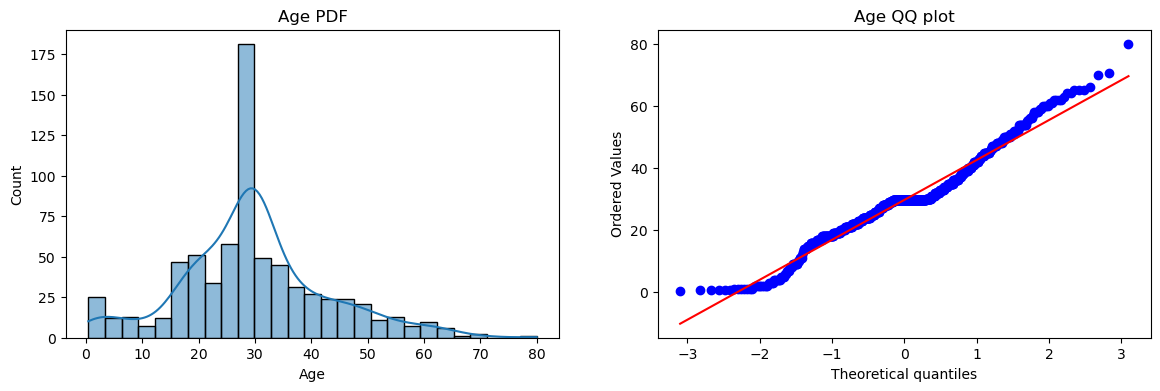

In [59]:
# check for age
fig,ax = plt.subplots(1,2,figsize=(14,4))

sns.histplot(X_train['Age'],kde=True,ax=ax[0])
ax[0].set_title('Age PDF')


stats.probplot(X_train['Age'],dist= 'norm',plot=ax[1])
ax[1].set_title('Age QQ plot')

plt.show()

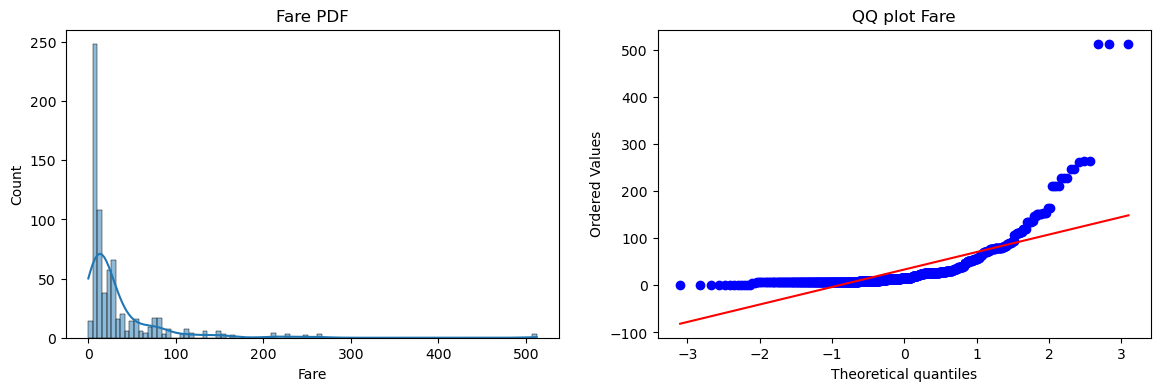

In [60]:
# check for Fare
fig,ax = plt.subplots(1,2,figsize=(14,4))

sns.histplot(X_train['Fare'],kde=True,ax=ax[0])
ax[0].set_title("Fare PDF")

stats.probplot(X_train['Fare'],dist='norm',plot=ax[1])
ax[1].set_title("QQ plot Fare")

plt.show()

# Now We Ckeck How Our Ml Model Will perform berfore transformation

In [61]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

# clf.fit(X_train,y_train)
# clf1.fit(X_train,y_train)

# check accuracy by cross value score
print("Accuracy of LR : ",cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy').mean())
print("Accuracy of DT : ",cross_val_score(clf1,X_train,y_train,cv=10,scoring='accuracy').mean())

Accuracy of LR :  0.6474178403755869
Accuracy of DT :  0.617820813771518


# now we apply log Transform


In [62]:
trf = FunctionTransformer(func=np.log1p)

In [63]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [64]:
# let's check the performance of our ml model is increase or not
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

#check the accuracy by cross value score
print("Accuracy of LR: ",cross_val_score(clf,X_train_transformed,y_train,cv=10,scoring='accuracy').mean())
print("Accuracy of DT: ",cross_val_score(clf1,X_train_transformed,y_train,cv=10,scoring='accuracy').mean())

Accuracy of LR:  0.6643388106416275
Accuracy of DT:  0.6150821596244131


**Here we can see that accuracy of LR is increase that's prove function transformer are more useful in Regression Models**

In [65]:
# let's see how our data is distributed by function transformed

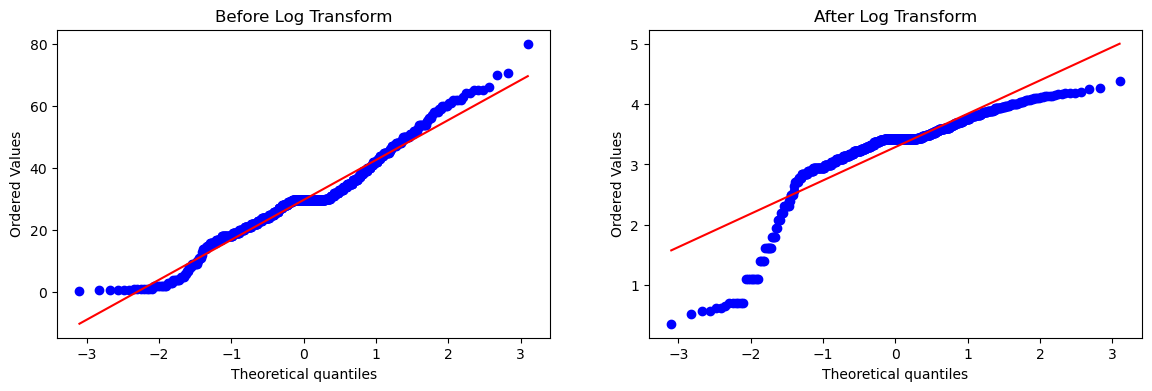

In [66]:
# for Age
fig,ax = plt.subplots(1,2,figsize=(14,4))

stats.probplot(X_train['Age'],dist='norm',plot=ax[0])
ax[0].set_title("Before Log Transform")

stats.probplot(X_train_transformed['Age'],dist='norm',plot=ax[1])
ax[1].set_title("After Log Transform")

plt.show()

**As we can see that log transform is not much useful for Age**

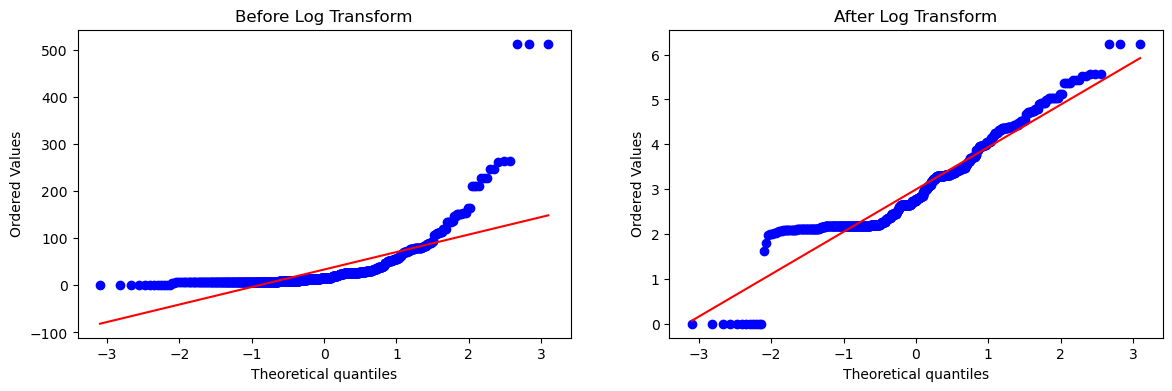

In [67]:
# for Fare
fig,ax = plt.subplots(1,2,figsize=(14,4))

stats.probplot(X_train['Fare'],dist='norm',plot=ax[0])
ax[0].set_title("Before Log Transform")

stats.probplot(X_train_transformed['Fare'],dist='norm',plot=ax[1])
ax[1].set_title("After Log Transform")

plt.show()

**As we can see that log transform is useful for Fare**

# so we can conclude that we have to perform only log transform on fare , not on age 

In [68]:
# lets perform log transform on only fare not on age 
trf2 = ColumnTransformer(transformers = [('log_fare',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [69]:
# now pass the data
X_transformed = trf2.fit_transform(X)

# lets check the accuracy is increase or not
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

# check accuracy by cross value score
print("Accuracy of LR : ",cross_val_score(clf,X_transformed,y,cv=10,scoring='accuracy').mean())
print("Accuracy of DT : ",cross_val_score(clf1,X_transformed,y,cv=10,scoring='accuracy').mean())

Accuracy of LR :  0.6712609238451936
Accuracy of DT :  0.6588389513108613


# here accuracy is not increase much ,but we learn how to apply Fuction Transform

# let's create fuction to check all transformation 

In [87]:
def apply_function_transform(transform,feature):
    trf3 = ColumnTransformer(transformers=[('Transform_function',FunctionTransformer(transform),[feature])],remainder='passthrough')
    
    X = df.iloc[:,1:]
    y = df.iloc[:,:1]

    X_transform = trf3.fit_transform(X)

    clf = LogisticRegression()
    clf1 = DecisionTreeClassifier()

    # check accuracy
    print('Accuracy of LR : ',cross_val_score(clf,X_transform,y,cv=10,scoring='accuracy').mean())
    print('Accuracy of DT : ',cross_val_score(clf1,X_transform,y,cv=10,scoring='accuracy').mean())

    # check distribution before and after
    fig,ax = plt.subplots(1,2,figsize=(14,4))
    
    stats.probplot(X[feature],dist='norm',plot=ax[0])
    ax[0].set_title("Before Tansformed")

    if feature == 'Fare':
        feature = 1
    else :
        feature = 0

    stats.probplot(X_transform[:,feature],dist='norm',plot=ax[1])
    ax[1].set_title("After Tansformed")

    plt.show()

Accuracy of LR :  0.6431335830212235
Accuracy of DT :  0.6577028714107366


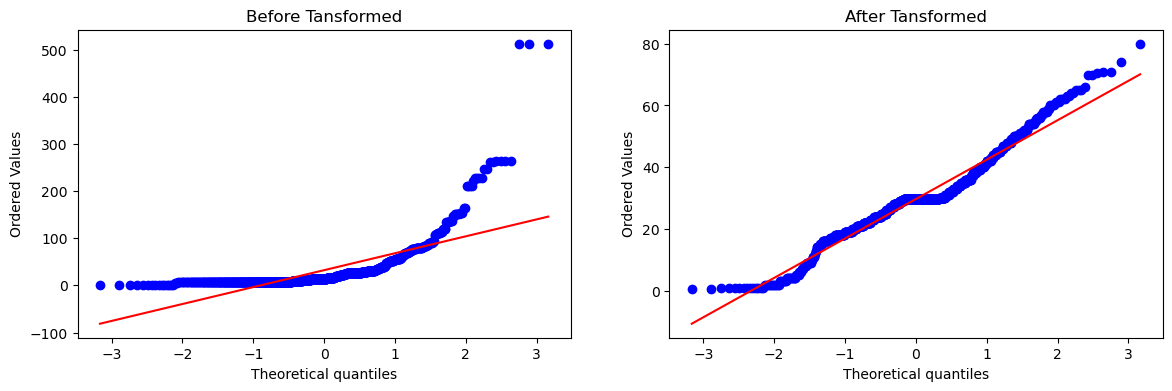

In [95]:
# this function is noly transform one feature at time 
# features are Fare and Age
# we can pass any custom function it
apply_function_transform(lambda x : x**2,'Fare')